## Polynomial Regression Model

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading Data
df = pd.read_csv("Polynomialdata_train.csv")

In [3]:
# Shuffle the dataframe values
np.random.seed(42)
df_shuffled = df.sample(frac=1).reset_index(drop=True)
df_values = df_shuffled.values

In [4]:
# Shuffle the dataframe values
X = df_values[:, 1:]
y = df_values[:, 0].reshape(-1,1)

In [5]:
theta = np.zeros((X.shape[1],1))

In [6]:
# Normalization of features variable
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    norm_X = (X - mean) / std
    return norm_X

In [7]:
# Generating polynomial features
def df_polynomial(X,degree):
    n = X.shape[1]
    poly_X = []
    for d in range(1,degree + 1):
        for i in range(n):
            poly_X.append(X[:, i]**d)

    for i in range(n):
        for j in range(i + 1, n):
            for d in range(1, degree):
                poly_X.append(X[:, i]**d * X[:, j])

    for i in range(n):
        for j in range(i + 1, n):
            for d in range(2, degree):
                poly_X.append(X[:, j]**d * X[:, i])
    poly_X = np.column_stack(poly_X)
    return poly_X

In [8]:
def polynomial_regression(X,y,alpha,itr,lambd):
    theta = np.zeros((X.shape[1],1))
    cost_list = []
    m = y.size
    for i in range(itr):
        pred = np.dot(X,theta)
        error = pred - y
        regularization = (lambd / (2 * m)) * np.sum(theta[1:]**2)

        # Cost Calculation
        cost = np.sum(np.square(error))/(2*m) + regularization
        cost_list.append(cost)

        # Gradient Descent
        gradient = np.dot(X.T,error) / m + (lambd / m) * np.vstack([0, theta[1:]])
        theta = theta-alpha * gradient

        if (i+1)%100==0 or i==0:
            print("Itr",i+1,": Cost =", cost)

    return theta,cost_list

In [9]:
learning_rate = 0.06
iteration = 2500
degree = 4
lambd = 100

In [10]:
X = df_polynomial(X,degree=degree)
X = normalize(X)
ones_column = np.ones((X.shape[0], 1))
X = np.concatenate((ones_column, X), axis=1)

In [11]:
# Cross-validation sets (80:20 split)
train_size = int(len(X) * 0.8)
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

In [12]:
theta, cost_list = polynomial_regression(X_train, y_train, alpha = learning_rate, itr =iteration, lambd=lambd)

Itr 1 : Cost = 70174056995335.9
Itr 100 : Cost = 9992170005867.5
Itr 200 : Cost = 7701336304176.455
Itr 300 : Cost = 7269173168317.391
Itr 400 : Cost = 7185649733075.746
Itr 500 : Cost = 7169383155609.067
Itr 600 : Cost = 7166200434161.878
Itr 700 : Cost = 7165575794676.859
Itr 800 : Cost = 7165452945572.876
Itr 900 : Cost = 7165428748363.6875
Itr 1000 : Cost = 7165423977012.1875
Itr 1100 : Cost = 7165423035361.864
Itr 1200 : Cost = 7165422849395.117
Itr 1300 : Cost = 7165422812647.697
Itr 1400 : Cost = 7165422805382.816
Itr 1500 : Cost = 7165422803945.959
Itr 1600 : Cost = 7165422803661.664
Itr 1700 : Cost = 7165422803605.397
Itr 1800 : Cost = 7165422803594.257
Itr 1900 : Cost = 7165422803592.049
Itr 2000 : Cost = 7165422803591.611
Itr 2100 : Cost = 7165422803591.524
Itr 2200 : Cost = 7165422803591.508
Itr 2300 : Cost = 7165422803591.504
Itr 2400 : Cost = 7165422803591.505
Itr 2500 : Cost = 7165422803591.502


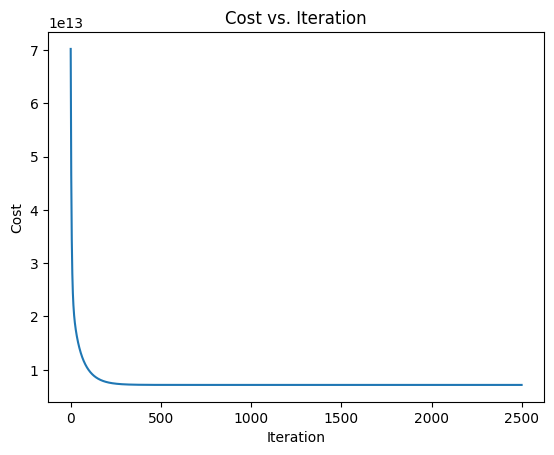

In [13]:
# Graph: Cost vs Iteration
plt.plot(range(iteration), cost_list)
plt.title('Cost vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

In [14]:
# Checking R-2 Score
pred = np.dot(X_val,theta)
ssr = np.sum((pred - np.mean(y_val))**2)
sse = np.sum((y_val - pred)**2)
r2_score = 1 - (sse / (ssr + sse))
print(f'R-squared score on validation set: {r2_score}')

R-squared score on validation set: 0.9102795240143028


In [16]:
# Loading Test data
test = pd.read_csv("Polynomialdata_test.csv")

# Extracting features and target variable
test=test.values
X_test = test[:, 1:]

# Normalisation and creation of polynimal features
X_test = df_polynomial(X_test,degree=degree)
X_test = normalize(X_test)
ones_column = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((ones_column, X_test), axis=1)


In [17]:
# Predicting Values on Test Data
y_pred = np.dot(X_test,theta)
print(y_pred)

[[ -735608.69484589]
 [ -385603.47291461]
 [  203540.29878833]
 ...
 [  756796.09163538]
 [-1374658.43447428]
 [ 1390207.08245121]]


In [18]:
column_names = ['target'] + [f'features_{i}' for i in range(1,4)]
Result = pd.DataFrame(data=np.column_stack([y_pred, test[:, 1:]]), columns=column_names)
Result
# file_path = "Polynomial_output.csv"
# Result.to_csv(file_path, index=False)

,target,features_1,features_2,features_3
0,-7.356087e+05,36.247643,-2.372704,43.835947
1,-3.856035e+05,5.903779,5.460086,-96.149414
2,2.035403e+05,-37.298157,6.869786,-14.084487
3,-7.947180e+05,-40.080077,2.395066,-43.432941
4,1.100671e+06,-20.417799,-2.194459,5.737226
...,...,...,...,...
9995,-1.057179e+06,-13.571554,2.931176,76.902716
9996,3.762678e+05,-2.015904,-2.827700,4.999604
9997,7.567961e+05,47.095192,-1.977461,39.044902
9998,-1.374658e+06,-1.808178,-0.693782,57.918628
